<a href="https://colab.research.google.com/github/MuthuJawahar1108/Mini-Project/blob/resnet/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**1.Install Dependencies and import libraries**




In [ ]:
# !pip install netron

In [ ]:
# !pip install pillow

In [ ]:
# !python --version

In [ ]:
# !pip list


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from PIL import Image
import os


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**2. Collecting and cleaning data**

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

In [ ]:
# classes = []
# parent_directory = "/content/drive/MyDrive/MedicinalPlantsDetection/training"

# for filename in os.listdir(parent_directory):
#     classes.append(filename)



# for i in range(len(classes)):

#     directory = f"/content/drive/MyDrive/MedicinalPlantsDetection/training/{classes[i]}"

#     for filename in os.listdir(directory):
#         if filename.endswith(".png"):
#             img = Image.open(os.path.join(directory,filename))


#     #webp  has an RGBA mode, which stands for Red, Green, Blue, and Alpha (transparency). JPEG format does not support alpha channels, so you need to convert the image to RGB mode before saving it as a JPEG.
#             if img.mode != 'RGB':
#                 img = img.convert('RGB')

#             new_filename = os.path.splitext(filename)[0]+".jpg"
#             # os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
#             img.save(os.path.join(directory,new_filename),"JPEG")
#             os.remove(os.path.join(directory,filename))


In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/MedicinalPlantsDetection/Converted",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3193 files belonging to 5 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Adathodai', 'Aloevera', 'Bringaraja', 'Lemon', 'Neem']

In [ ]:
len(dataset)

100

In [ ]:
2750/32


85.9375

In [ ]:

# classes = []
# parent_directory = "/content/drive/MyDrive/MedicinalPlantsDetection/training"

# for filename in os.listdir(parent_directory):
#     classes.append(filename)

# for i in range(len(classes)):

#     directory = f"/content/drive/MyDrive/MedicinalPlantsDetection/training/{classes[i]}"

#     # Iterate through each file in the directory
#     for filename in os.listdir(directory):
#         if filename.endswith(".jpg"):
#             # Construct the new filename with .jpeg extension
#             new_filename = os.path.splitext(filename)[0] + ".jpeg"

#             # Rename the file
#             os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))



In [ ]:
# classes = []
# parent_directory = "/content/drive/MyDrive/MedicinalPlantsDetection/training"

# for filename in os.listdir(parent_directory):
#     classes.append(filename)

# for i in range(len(classes)):

#     directory = f"/content/drive/MyDrive/MedicinalPlantsDetection/training/{classes[i]}"

#     # Sort the filenames in the directory
#     files = sorted(os.listdir(directory))

#     # Define the starting index for renaming
#     index = 101

#     # Iterate through each file in the directory
#     for filename in files:
#         new_filename = f"img_{index}.jpeg"  # Change the extension according to your file type
#         os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
#         index += 1


In [ ]:
# for image_batch, label_batch in dataset:
#     if tf.reduce_any(tf.math.is_nan(image_batch)) or tf.reduce_any(tf.math.is_inf(image_batch)):
#         print("NaN or infinite values found in the image batch")

In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 224, 224, 3)
[4 0 0 1 1 0 3 0 0 0 3 2 3 4 4 0 1 1 2 1 0 1 4 0 0 0 0 3 4 2 4 1]


In [ ]:
dataset.element_spec


(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [ ]:

for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)
    print(label_batch.numpy()[0])

[[[0.86524045 0.8809267  0.87700516]
  [0.86162543 0.87731177 0.87339014]
  [0.8616173  0.87667334 0.8727518 ]
  ...
  [0.8554723  0.8554723  0.8554723 ]
  [0.83447737 0.83507264 0.8254437 ]
  [0.82293403 0.8268556  0.80724776]]

 [[0.863217   0.87890327 0.8749817 ]
  [0.85844076 0.87412703 0.87020546]
  [0.87284213 0.88789815 0.8839766 ]
  ...
  [0.84999156 0.84999156 0.84999156]
  [0.834418   0.8345748  0.8262613 ]
  [0.82293403 0.8239669  0.81302506]]

 [[0.8602297  0.87591594 0.8719944 ]
  [0.8651792  0.88086545 0.8769439 ]
  [0.8691176  0.8841737  0.8802521 ]
  ...
  [0.8537307  0.8537307  0.8537307 ]
  [0.84313726 0.84313726 0.8352941 ]
  [0.83077717 0.83077717 0.82293403]]

 ...

 [[0.82713586 0.8310574  0.807528  ]
  [0.8325629  0.8364845  0.8129551 ]
  [0.8464459  0.8503675  0.8268381 ]
  ...
  [0.8890407  0.89688385 0.8929623 ]
  [0.8799721  0.8956584  0.8917368 ]
  [0.8817128  0.89739907 0.8934775 ]]

 [[0.82575285 0.8296744  0.8040791 ]
  [0.8254385  0.82936007 0.8037648 ]


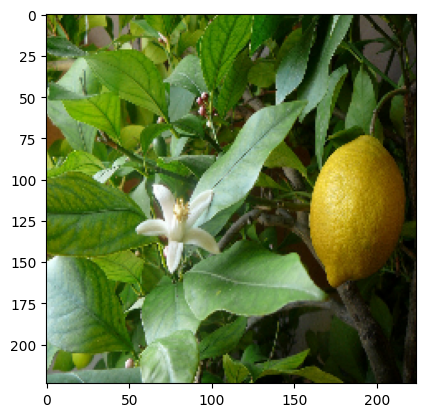

In [ ]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy()/255.0)

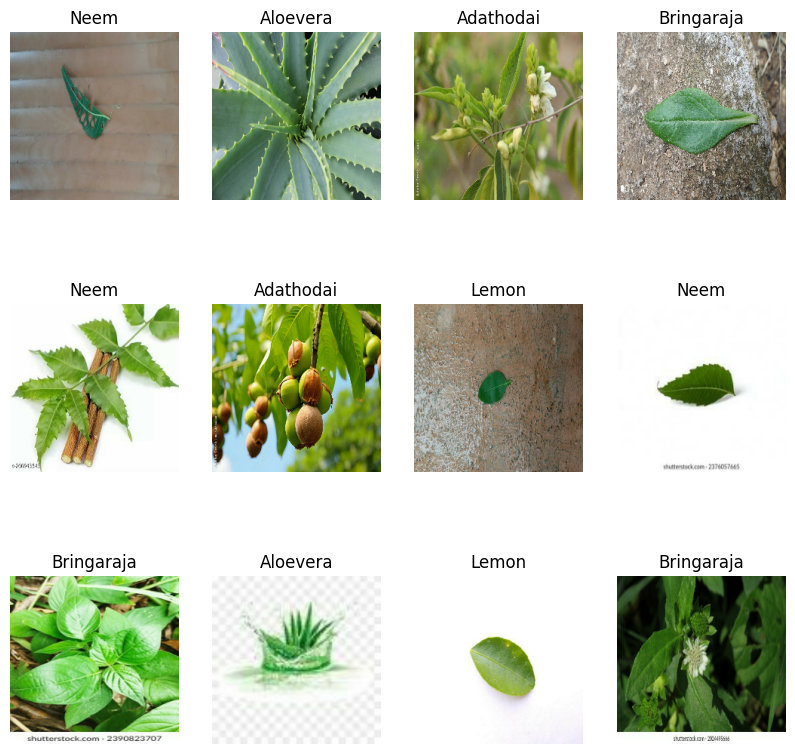

In [ ]:
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [ ]:
len(dataset)

100

In [ ]:
# 80% - training
# 20% - 10%(Validation) + 10%(testing)

In [ ]:
train_size = 0.8
len(dataset) * train_size

80.0

In [ ]:
train_ds = dataset.take(int(len(dataset)*train_size))
len(train_ds)

80

In [ ]:

rem_ds = dataset.skip(int(len(dataset)*train_size))
len(rem_ds)

20

In [ ]:
val_size = 0.10
len(dataset)*val_size

10.0

In [ ]:
val_ds = rem_ds.take(int(len(dataset)*val_size))
len(val_ds)

10

In [ ]:
test_ds = rem_ds.skip(int(len(dataset)*val_size))
len(test_ds)

10

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


**Residual Block function**

In [ ]:
def residual_block(x, filters, kernel_size=3, stride = 1,conv_shortcut=True,name=None):

    bn_axis = 3

    if conv_shortcut:
        shortcut = layers.Conv2D(4 * filters, 1, strides=stride, name=name + '_0_conv')(x)
        shortcut = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + '_0_bn')(shortcut)
    else:
        shortcut = x

    x = layers.Conv2D(filters, 1, strides=stride, name=name + '_1_conv')(x)
    x = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + '_1_bn')(x)
    x = layers.Activation('relu', name=name + '_1_relu')(x)

    x = layers.Conv2D(filters, kernel_size, padding='SAME', name=name + '_2_conv')(x)
    x = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + '_2_bn')(x)
    x = layers.Activation('relu', name=name + '_2_relu')(x)

    x = layers.Conv2D(4 * filters, 1, name=name + '_3_conv')(x)
    x = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + '_3_bn')(x)

    x = layers.Add(name=name + '_add')([shortcut, x])
    x = layers.Activation('relu', name=name + '_out')(x)
    return x

**Image Preprocessing**

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

**Data Augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

**Build ResNet50 Model**

In [ ]:
def build_resnet50(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Resizing and Rescaling
    x = resize_and_rescale(inputs)

    # Data augmentation
    x = data_augmentation(x)

    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(64, 7, strides=2, padding='SAME', name='conv1_conv')(x)
    x = layers.BatchNormalization(axis=3, epsilon=1.001e-5, name='conv1_bn')(x)
    x = layers.Activation('relu', name='conv1_relu')(x)
    x = layers.MaxPooling2D(3, strides=2, name='pool1_pool')(x)

    x = residual_block(x, 64, conv_shortcut=True, name='conv2_block1')
    x = residual_block(x, 64, conv_shortcut=False, name='conv2_block2')
    x = residual_block(x, 64, conv_shortcut=False, name='conv2_block3')

    x = residual_block(x, 128, stride=2, conv_shortcut=True, name='conv3_block1')
    x = residual_block(x, 128, conv_shortcut=False, name='conv3_block2')
    x = residual_block(x, 128, conv_shortcut=False, name='conv3_block3')
    x = residual_block(x, 128, conv_shortcut=False, name='conv3_block4')

    x = residual_block(x, 256, stride=2, conv_shortcut=True, name='conv4_block1')
    x = residual_block(x, 256, conv_shortcut=False, name='conv4_block2')
    x = residual_block(x, 256, conv_shortcut=False, name='conv4_block3')
    x = residual_block(x, 256, conv_shortcut=False, name='conv4_block4')
    x = residual_block(x, 256, conv_shortcut=False, name='conv4_block5')
    x = residual_block(x, 256, conv_shortcut=False, name='conv4_block6')

    x = residual_block(x, 512, stride=2, conv_shortcut=True, name='conv5_block1')
    x = residual_block(x, 512, conv_shortcut=False, name='conv5_block2')
    x = residual_block(x, 512, conv_shortcut=False, name='conv5_block3')

    x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
    x = layers.Dense(num_classes, activation='softmax', name='predictions')(x)

    model = models.Model(inputs, x, name='resnet50')
    return model

input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = len(class_names)

model = build_resnet50(input_shape, n_classes)


**Model Building**

In [ ]:
# CHANNELS = 3
# input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
# n_classes = len(class_names)

# model = models.Sequential([
#     resize_and_rescale,
#     data_augmentation,
#     layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.GlobalAveragePooling2D(),
#     layers.Dense(512, activation="relu"),
#     layers.Dropout(0.5),
#     layers.Dense(n_classes, activation="softmax")
# ])

# model.build(input_shape=input_shape)

# input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
# n_classes = len(class_names)

# model = build_resnet50(input_shape, n_classes)


In [ ]:
# CHANNELS = 3
# input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
# n_classes = 3


# model = models.Sequential([

#     resize_and_rescale,
#     data_augmentation,

#     #Convolution Layer
#     layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(128,kernel_size=(3,3),activation="relu"),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(256,kernel_size=(3,3),activation="relu"),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(512,kernel_size=(3,3),activation="relu"),
#     layers.MaxPooling2D((2,2)),


#     #Dense Layer
#     layers.Flatten(),
#     layers.Dense(128,activation="relu"),


#     layers.Dense(n_classes,activation="softmax")

# ])

# model.build(input_shape=input_shape)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['rescaling_1[0][0]']         
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
# model = tf.keras.models.load_model("/content/drive/MyDrive/Models/MiniProject/1/",compile=False)

In [ ]:
# model.compile(
#     optimizer="adam",
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     metrics=["accuracy"]
# )


In [ ]:
import datetime

# Define the TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
# Train the model with the checkpoint callback
history = model.fit(
    train_ds,
    epochs=25,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
    callbacks=[tensorboard_callback]
    # callbacks=[checkpoint_callback]  # Pass the checkpoint callback
)

Epoch 1/25
80/80 [==============================] - 993s 2s/step - loss: 1.6403 - accuracy: 0.4715 - val_loss: 1.9767 - val_accuracy: 0.1656
Epoch 2/25
80/80 [==============================] - 33s 413ms/step - loss: 1.1445 - accuracy: 0.5645 - val_loss: 1.9015 - val_accuracy: 0.2250
Epoch 3/25
80/80 [==============================] - 31s 390ms/step - loss: 1.0774 - accuracy: 0.5887 - val_loss: 1.8610 - val_accuracy: 0.2875
Epoch 4/25
80/80 [==============================] - 32s 398ms/step - loss: 1.0215 - accuracy: 0.6270 - val_loss: 1.8514 - val_accuracy: 0.2906
Epoch 5/25
80/80 [==============================] - 33s 413ms/step - loss: 0.9789 - accuracy: 0.6441 - val_loss: 1.9592 - val_accuracy: 0.3500
Epoch 6/25
80/80 [==============================] - 32s 404ms/step - loss: 0.9240 - accuracy: 0.6566 - val_loss: 1.5957 - val_accuracy: 0.4531
Epoch 7/25
80/80 [==============================] - 31s 394ms/step - loss: 0.9080 - accuracy: 0.6715 - val_loss: 1.9695 - val_accuracy: 0.5000
E

In [ ]:
# !pip install pydot pydot_ng graphviz

In [ ]:
!tensorboard --logdir logs/fit


2024-05-23 10:46:23.054956: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 10:46:23.055013: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 10:46:23.056307: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-23 10:46:24.124220: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import plot_model, to_categorical

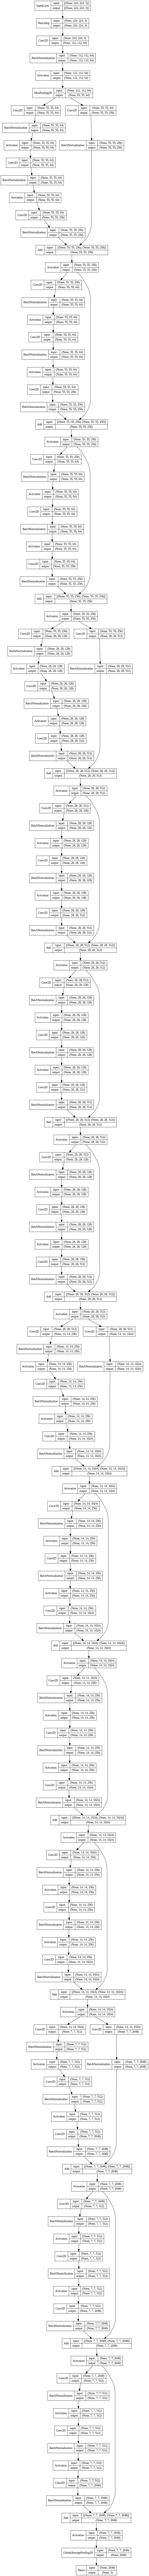

In [ ]:
# Visualize the model
plot_model(model, to_file='model1.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
# EPOCHS = 30

# history = model.fit(
#     train_ds,
#     epochs = EPOCHS,
#     batch_size = BATCH_SIZE,
#     verbose = 1,
#     validation_data = val_ds
# )

In [ ]:
# # Load the model
# model.load_weights('model_checkpoint.h5')

# # Continue training
# history = model.fit(
#     train_ds,
#     epochs=30,  # Increase the number of epochs
#     batch_size=BATCH_SIZE,
#     verbose=1,
#     validation_data=val_ds,
#     callbacks=[checkpoint_callback]  # Pass the checkpoint callback
# )


In [ ]:
history.params


{'verbose': 1, 'epochs': 25, 'steps': 80}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

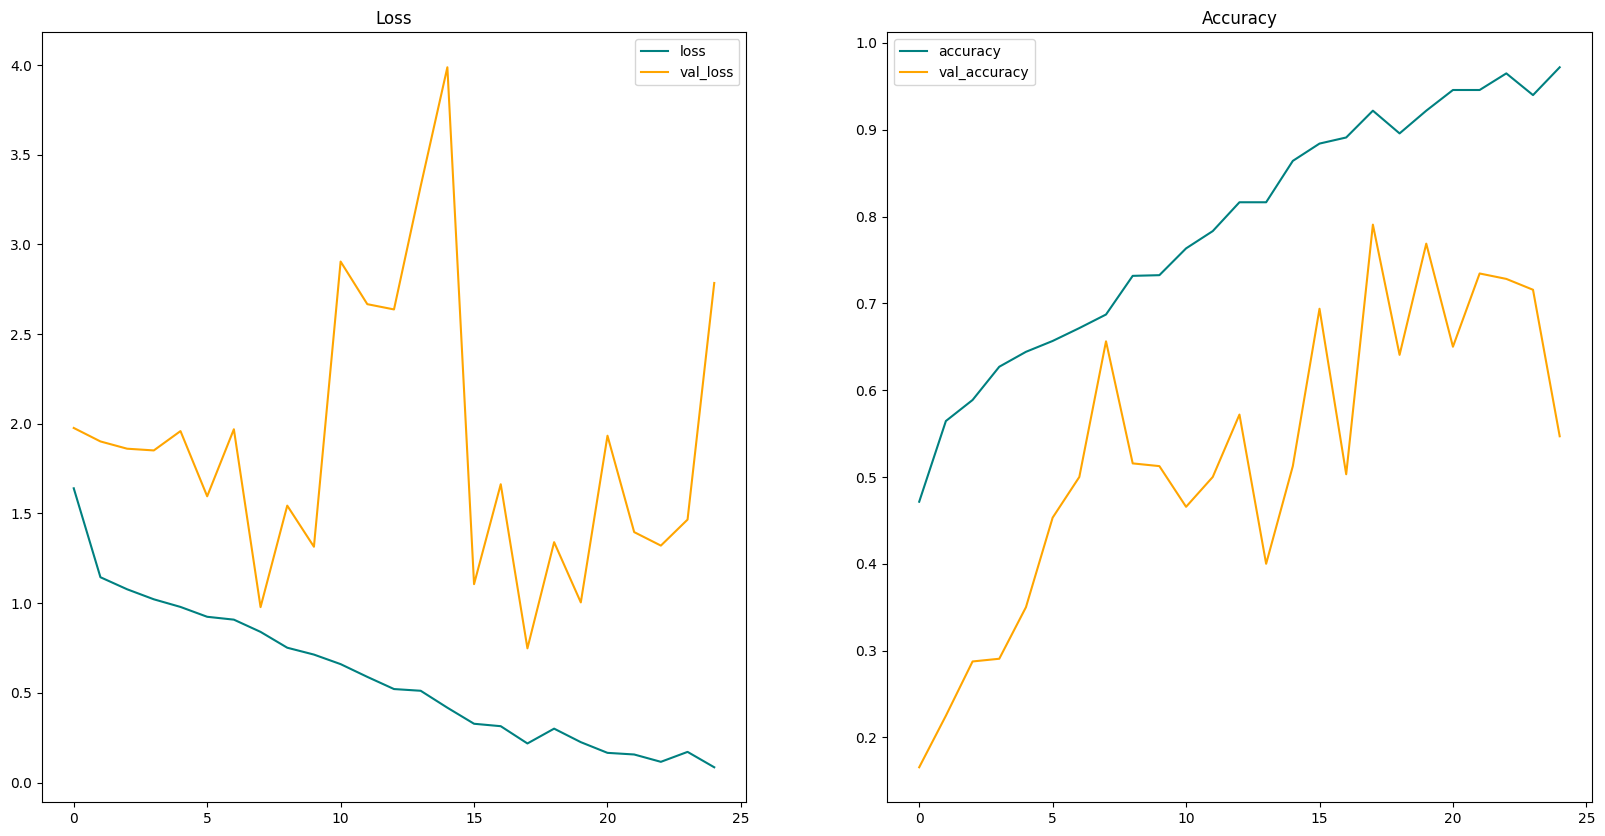

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].plot(history.history["loss"],color="teal",label="loss")
ax[0].plot(history.history["val_loss"],color="orange",label="val_loss")
ax[0].title.set_text("Loss")
ax[0].legend()

ax[1].plot(history.history["accuracy"],color="teal",label="accuracy")
ax[1].plot(history.history["val_accuracy"],color="orange",label="val_accuracy")
ax[1].title.set_text("Accuracy")
ax[1].legend()

In [ ]:

model_version=3
model.save(f"/content/drive/MyDrive/Models/MiniProject/{model_version}")
model.save(f"/content/drive/MyDrive/Models/MiniProject/medicinal_resnet{model_version}.keras")
model.save(f"/content/drive/MyDrive/Models/MiniProject/med_final_resnet{model_version}.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# import numpy as np

# for images_batch , labels_batch in test_ds.take(1):
#     first_image = images_batch[0].numpy().astype("uint8")
#     first_label = labels_batch[0].numpy()

#     print("First image to predict")
#     plt.imshow(first_image)
#     print("First image's actual label: ",class_names[first_label])

#     batch_prediction = model.predict(images_batch) #Prediction for 32 images
#     print("Predicted_label: ",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0) #Create a branch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class,confidence

1/1 [==============================] - 0s 24ms/step


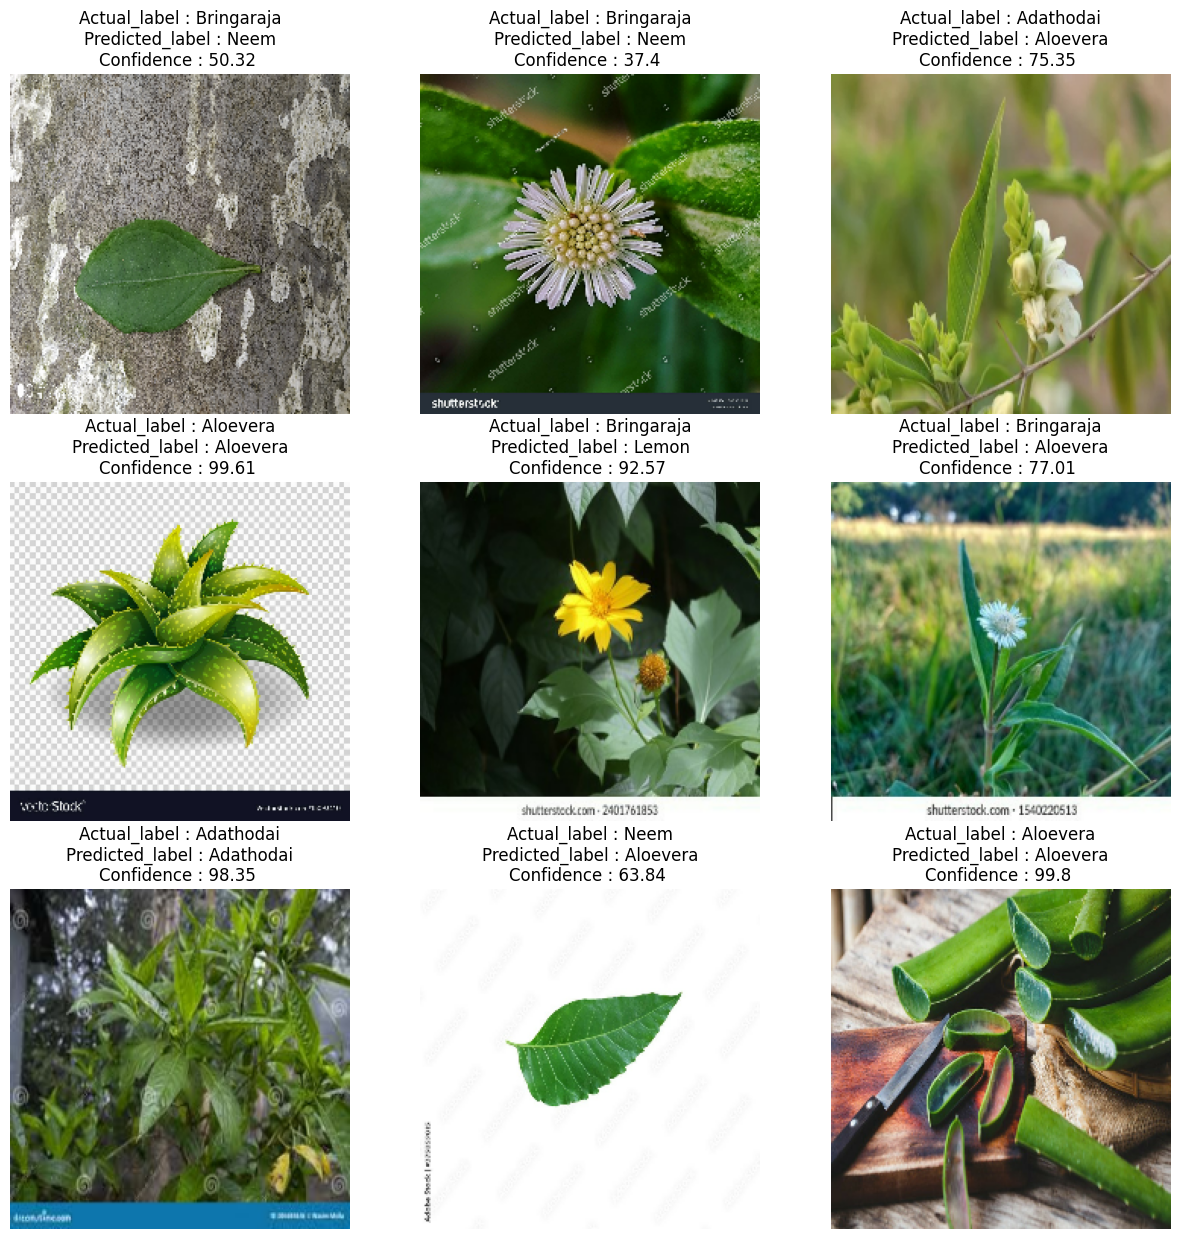

In [ ]:

import numpy as np

plt.figure(figsize=(15,15))
for images , labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))


        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i].numpy()]

        plt.title(f"Actual_label : {actual_class}\nPredicted_label : {predicted_class}\nConfidence : {confidence} ")
        plt.axis("off")



In [ ]:
from PIL import Image
from google.colab import files

def display_and_predict_uploaded_image(model, class_names):
    uploaded = files.upload()
    for fn in uploaded.keys():
        img = Image.open(fn)
        img = img.resize((224, 224))

        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis("off")
        plt.show()

        predicted_class, confidence = predict(model, np.array(img))
        print(f"Predicted label: {predicted_class}, Confidence: {confidence}%")

display_and_predict_uploaded_image(model, class_names)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# import matplotlib.pyplot as plt
# from PIL import Image
# import numpy as np
# import tensorflow as tf

# # Load the saved model
# model = tf.keras.models.load_model("/content/drive/MyDrive/Models/MiniProject/med_final.h5")

# # Load and preprocess the image
# image_path = "2.jpg"
# img = Image.open(image_path)
# img = img.resize((240, 240))  # Resize to match model input size
# img_array = np.expand_dims(np.array(img), axis=0)
# img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

# # Make predictions
# predictions = model.predict(img_array)
# predicted_class = np.argmax(predictions)
# confidence = np.max(predictions)

# # Display the image and predictions
# plt.figure(figsize=(8, 8))
# plt.imshow(img)
# plt.title(f"Predicted label: {predicted_class}\nConfidence: {confidence}")
# plt.axis("off")
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# from PIL import Image
# import numpy as np
# import tensorflow as tf
# from keras.losses import SparseCategoricalCrossentropy

# # Define the custom loss function
# custom_loss = SparseCategoricalCrossentropy()

# # Load the saved model
# model = tf.keras.models.load_model("med_final.h5", custom_objects={"SparseCategoricalCrossentropy": custom_loss})

# # Load and preprocess the image
# image_path = "11.jpg"
# img = Image.open(image_path)
# img = img.resize((240, 240))  # Resize to match model input size
# img_array = np.expand_dims(np.array(img), axis=0)
# img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

# # Make predictions
# predictions = model.predict(img_array)
# predicted_class = np.argmax(predictions)
# confidence = np.max(predictions)

# # Display the image and predictions
# plt.figure(figsize=(8, 8))
# plt.imshow(img)
# plt.title(f"Predicted label: {predicted_class}\nConfidence: {confidence}")
# plt.axis("off")
# plt.show()
